<a href="https://colab.research.google.com/github/Shefali2512/codealpha_tasks/blob/main/Task%204%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset loaded successfully!
Columns found: ['review', 'sentiment']

Sample data:
                                                text true_sentiment
0  One of the other reviewers has mentioned that ...       positive
1  A wonderful little production. <br /><br />The...       positive
2  I thought this was a wonderful way to spend ti...       positive
3  Basically there's a family where a little boy ...       negative
4  Petter Mattei's "Love in the Time of Money" is...       positive

Performing sentiment analysis...

Detecting emotions...

==== Sentiment Distribution ====
True Sentiment:
true_sentiment
positive    25000
negative    25000
Name: count, dtype: int64

VADER Predicted Sentiment:
vader_pred
positive    32802
negative    16859
neutral       339
Name: count, dtype: int64

TextBlob Predicted Sentiment:
textblob_pred
positive    25573
neutral     19699
negative     4728
Name: count, dtype: int64

==== VADER Performance ====


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.79      0.53      0.64     25000
     neutral       0.00      0.00      0.00         0
    positive       0.65      0.85      0.74     25000

    accuracy                           0.69     50000
   macro avg       0.48      0.46      0.46     50000
weighted avg       0.72      0.69      0.69     50000


==== TextBlob Performance ====


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.94      0.18      0.30     25000
     neutral       0.00      0.00      0.00         0
    positive       0.76      0.78      0.77     25000

    accuracy                           0.48     50000
   macro avg       0.57      0.32      0.36     50000
weighted avg       0.85      0.48      0.53     50000


==== Emotion Frequency ====
emotions
neutral    50000
Name: count, dtype: int64

==== Sentiment vs Emotion ====
primary_emotion  neutral
true_sentiment          
negative           25000
positive           25000


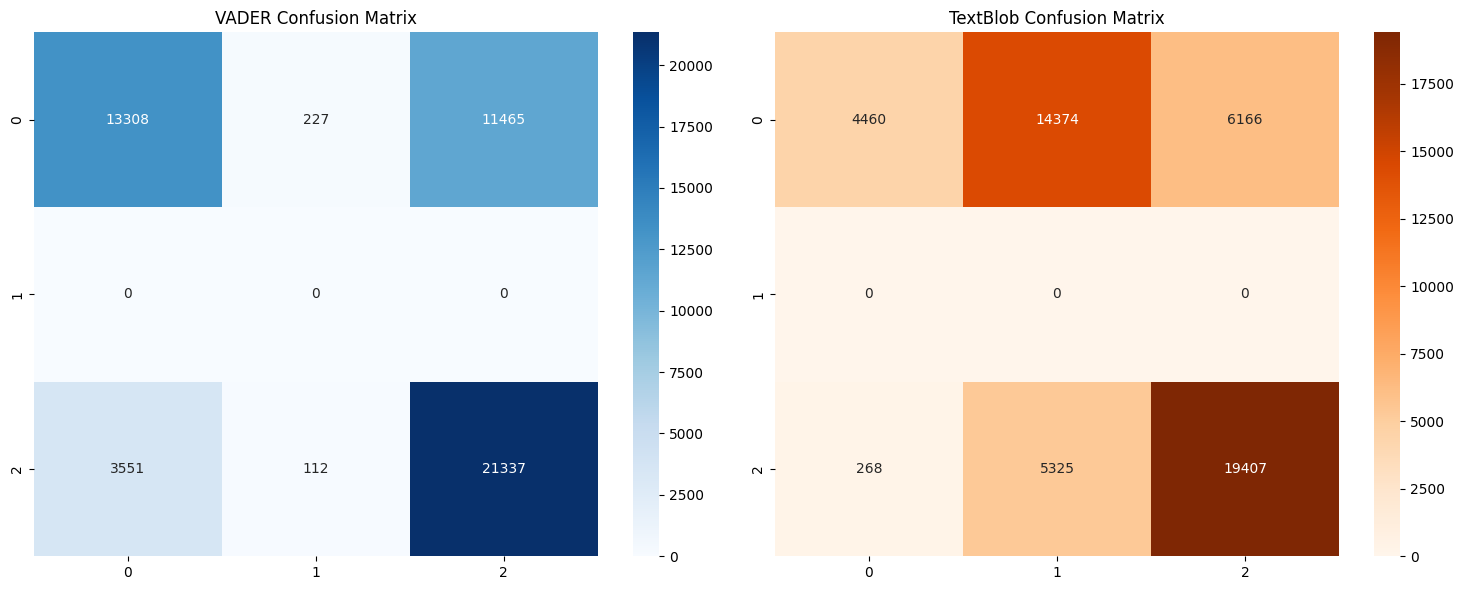

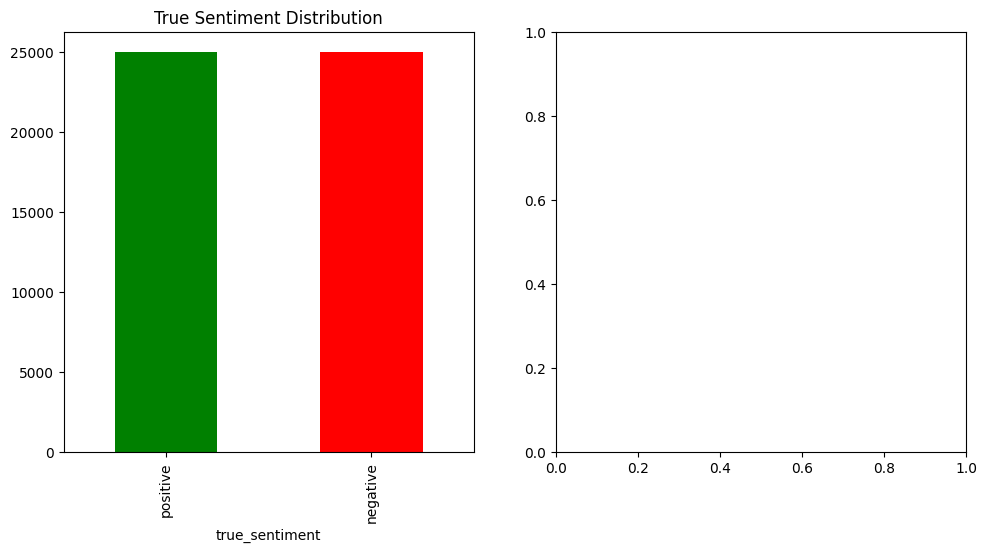

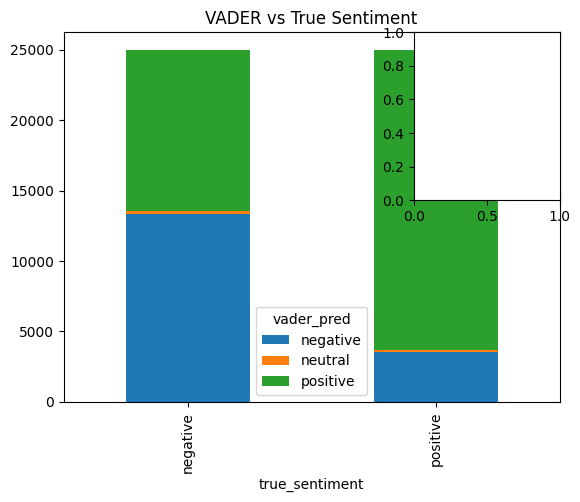

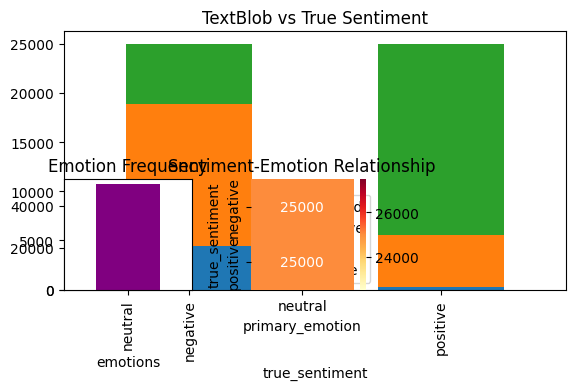


Results saved to 'enhanced_amazon_reviews_analysis.csv'

==== Key Insights ====
1. Dataset contains 50000 reviews
2. Most common emotion: neutral (50000 occurrences)
3. Model Accuracy:
   - VADER: 69.29%
   - TextBlob: 47.73%


In [ ]:
#Task-4 Sentiment Analysis

#IMDB Movie Reviews Sentiment Analysis (With Ground Truth Comparison)

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Download required NLTK datasets
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# ======================
# 1. Load & Prepare Data
# ======================
try:
    df = pd.read_csv('/content/IMDB Dataset.csv')
    print("Dataset loaded successfully!")
    print("Columns found:", df.columns.tolist())

    # Standardize column names
    df = df.rename(columns={
        'review': 'text',
        'sentiment': 'true_sentiment'
    })

    # Clean data
    df = df.dropna(subset=['text', 'true_sentiment'])
    df['true_sentiment'] = df['true_sentiment'].str.lower().str.strip()

    print("\nSample data:")
    print(df.head())

except Exception as e:
    print("Error loading data:", e)
    exit()

# ======================
# 2. Sentiment Analysis
# ======================
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    # VADER analysis
    vader_score = sia.polarity_scores(str(text))['compound']

    # TextBlob analysis
    textblob_score = TextBlob(str(text)).sentiment.polarity

    return {
        'vader_score': vader_score,
        'textblob_score': textblob_score
    }

print("\nPerforming sentiment analysis...")
sentiment_results = df['text'].apply(analyze_sentiment).apply(pd.Series)
df = pd.concat([df, sentiment_results], axis=1)

# Classify sentiments
def classify_sentiment(score, analyzer_name):
    if analyzer_name == 'vader':
        thresholds = {'positive': 0.05, 'negative': -0.05}
    else:  # textblob
        thresholds = {'positive': 0.1, 'negative': -0.1}

    if score > thresholds['positive']:
        return 'positive'
    elif score < thresholds['negative']:
        return 'negative'
    else:
        return 'neutral'

df['vader_pred'] = df['vader_score'].apply(lambda x: classify_sentiment(x, 'vader'))
df['textblob_pred'] = df['textblob_score'].apply(lambda x: classify_sentiment(x, 'textblob'))

# ======================
# 3. Emotion Detection
# ======================
emotion_lexicon = {
    'happy': ['happy', 'joy', 'excited', 'pleased', 'delighted', 'love', 'great', 'awesome'],
    'angry': ['angry', 'furious', 'annoyed', 'mad', 'irritated', 'hate', 'worst', 'awful'],
    'sad': ['sad', 'depressed', 'unhappy', 'miserable', 'gloomy', 'disappointed', 'regret'],
    'surprise': ['surprised', 'amazed', 'astonished', 'shocked', 'wow', 'impressive'],
    'fear': ['scared', 'afraid', 'terrified', 'fearful', 'dangerous', 'unsafe']
}

def detect_emotions(text):
    try:
        tokens = word_tokenize(str(text).lower())
        emotions = []
        for word in tokens:
            for emotion, keywords in emotion_lexicon.items():
                if word in keywords:
                    emotions.append(emotion)
        return list(set(emotions)) if emotions else ['neutral']
    except:
        return ['neutral']

print("\nDetecting emotions...")
df['emotions'] = df['text'].apply(detect_emotions)

# ======================
# 4. Analysis & Evaluation

print("\n==== Sentiment Distribution ====")
print("True Sentiment:")
print(df['true_sentiment'].value_counts())

print("\nVADER Predicted Sentiment:")
print(df['vader_pred'].value_counts())

print("\nTextBlob Predicted Sentiment:")
print(df['textblob_pred'].value_counts())

# Evaluation metrics
print("\n==== VADER Performance ====")
print(classification_report(df['true_sentiment'], df['vader_pred']))

print("\n==== TextBlob Performance ====")
print(classification_report(df['true_sentiment'], df['textblob_pred']))

# Confusion matrices
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(df['true_sentiment'], df['vader_pred']),
            annot=True, fmt='d', cmap='Blues')
plt.title("VADER Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(df['true_sentiment'], df['textblob_pred']),
            annot=True, fmt='d', cmap='Oranges')
plt.title("TextBlob Confusion Matrix")

plt.tight_layout()

# Emotion analysis
emotion_counts = df['emotions'].explode().value_counts()
print("\n==== Emotion Frequency ====")
print(emotion_counts)

# Sentiment-Emotion relationship
df['primary_emotion'] = df['emotions'].apply(lambda x: x[0] if x else 'neutral')
cross_tab = pd.crosstab(df['true_sentiment'], df['primary_emotion'])
print("\n==== Sentiment vs Emotion ====")
print(cross_tab)

# ======================
# 5. Visualization
# ======================
plt.figure(figsize=(18, 12))

# Plot 1: True sentiment distribution
plt.subplot(2, 3, 1)
df['true_sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("True Sentiment Distribution")

# Plot 2: VADER vs True sentiment
plt.subplot(2, 3, 2)
pd.crosstab(df['true_sentiment'], df['vader_pred']).plot(kind='bar', stacked=True)
plt.title("VADER vs True Sentiment")

# Plot 3: TextBlob vs True sentiment
plt.subplot(2, 3, 3)
pd.crosstab(df['true_sentiment'], df['textblob_pred']).plot(kind='bar', stacked=True)
plt.title("TextBlob vs True Sentiment")

# Plot 4: Emotion distribution
plt.subplot(2, 3, 4)
emotion_counts.plot(kind='bar', color='purple')
plt.title("Emotion Frequency")

# Plot 5: Sentiment-Emotion heatmap
plt.subplot(2, 3, 5)
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Sentiment-Emotion Relationship")

plt.tight_layout()
plt.show()

# ======================
# 6. Save Results
output_filename = 'enhanced_IMDB_reviews_analysis.csv'
df.to_csv(output_filename, index=False)
print(f"\nResults saved to '{output_filename}'")

# Show insights
print("\n==== Key Insights ====")
print(f"1. Dataset contains {len(df)} reviews")
print(f"2. Most common emotion: {emotion_counts.idxmax()} ({emotion_counts.max()} occurrences)")
print("3. Model Accuracy:")
print(f"   - VADER: {(df['vader_pred'] == df['true_sentiment']).mean():.2%}")
print(f"   - TextBlob: {(df['textblob_pred'] == df['true_sentiment']).mean():.2%}")
